# 计算患癌症概率

阳性：有癌症概率大   
阴性：无癌症概率大  

先验概率：1%  人群里患癌症的概率  
敏感性(sensitivity)：90%   患癌症被检查出的概率   
特异性(specificity)：90%   没有患癌症检查结论是阴性的概率  
错误率：10%   没有患癌症检查结论是有阳性的概率  

没有症状的前提下，检查结论是阳性，求得癌症的概率？ 

In [45]:
0.01*0.9*0.9

0.008100000000000001

# 贝叶斯理论

## 符号与公式

### 先验概率(prior)
P(C) = 1% = 0.01 : 先验概率，即P(Cancer)  
P(~C) = 1 - P(C) = 99% = 0.99 : 人群中没有患癌症的概率  
P(Pos|C) = 90% = 0.9 : 敏感性，已患癌症，被检查出阳性的概率，即P(positive|Cancer)  
P(Neg|~C) = 90% = 0.9 : 特异性，未患癌症，被检查出阴性的概率，即P(Negative|Not Cancer)  
P(Pos|~C) = 1 - P(Neg|~C) = 10% = 0.1 : 未患癌症，被检查出阳性的概率    

### 联合概率(joint)
P(C,Pos) = P(Pos,C): 患癌症，同时检查结果是阳性的概率，即P(Cancer,positive)   
P(~C,Pos) = P(Pos,~C): 没有患癌症，同时检查结果是阳性的概率，即P(Not Cancer,positive)  
  

则有：
> P(C,Pos) = P(C) · P(Pos|C)  

P(C,Pos) = 0.01 * 0.9 = 0.009

> P(~C,Pos) = P(~C) · P(Pos|~C)  

P(~C,Pos) = 0.99 * 0.1 = 0.099

### 图形展示概率关系

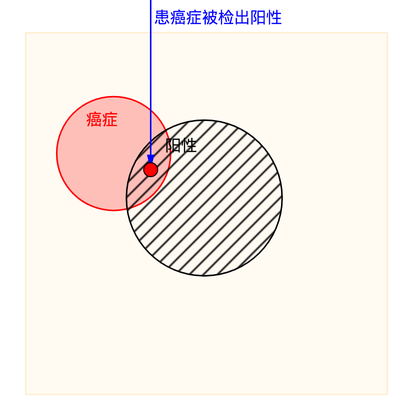

In [46]:
from PIL import Image
img = Image.open("bayes-cancer.png")
img.resize((img.size[0]/2, img.size[1]/2),Image.ANTIALIAS)

### 全概率
P(POS)：人群中检查出阳性的概率。
> P(POS)= P(C,POS) + P(~C,POS)  

P(POS) = 0.009 + 0.099 = 0.108  


### 后验概率(posterior)
> P(C|POS) = P(C,POS)/P(POS)   

P(C|POS) = 0.009 / 0.108 = 0.0833

> P(~C|POS) = P(~C,POS)/P(POS)  

P(~C|POS) = 0.099 / 0.108 = 0.9167  

> P(C|POS) + P(~C|POS) = 1  

P(C|POS) 与 P(~C|POS) 之和是P(POS)的全集。

### 验证P(C,Pos) 等于 P(POS,C)
P(C,Pos) = P(C) · P(Pos|C) = 0.01 \* 0.9 = 0.009  
P(POS,C) = P(POS) · P(C|POS) = 0.108 \* 0.0833 = 0.0089964 ≈ 0.009

## 贝叶斯定理推演

$\begin{align}
\large \color{green}{P(POS)} & \large = \color{Goldenrod}{P(C,POS)} + \color{Goldenrod}{P(\sim C,POS)} \\
\\
\large \color{Goldenrod}{P(C,Pos)} & \large = \color{blue}{P(C) · P(Pos|C)} \\
\\
\large \color{Goldenrod}{P(\sim C,Pos)} & \large = \color{blue}{P(\sim C)} · \color{blue}{P(Pos|\sim C)} \\ 
\\
\large \color{Goldenrod}{P(POS,C)} & \large = \color{green}{P(POS)} · \color{red}{P(C|POS)} \\
\\
\large \color{Goldenrod}{P(C,Pos)} & \large = \color{Goldenrod}{P(POS,C)}   \\
& \large \Downarrow\\
\large \color{blue}{P(C) · P(Pos|C)} & \large = \color{green}{P(POS)} · \color{red}{P(C|POS)}  \\
& \large \Downarrow\\
\large \color{red}{P(C|POS)} & \large = \frac{\color{blue}{P(C) · P(Pos|C)}}{\color{green}{P(POS)}} \\
\\
& \large = \frac{\color{blue}{P(C) · P(Pos|C)}}{\color{Goldenrod}{P(C,POS)} + \color{Goldenrod}{P(\sim C,POS)}} \\
\\
& \large = \frac{\color{blue}{P(C) · P(Pos|C)}}{\color{blue}{P(C) · P(Pos|C)} + \color{blue}{P(\sim C)} · \color{blue}{P(Pos|\sim C)}}
\end{align}$

### 贝叶斯定理文字描述

> ** A和B的同时发生的概率 = A的概率 · A条件下B发生的概率 = B的概率 · B条件下A发生的概率 **

### 贝叶斯定理演化图

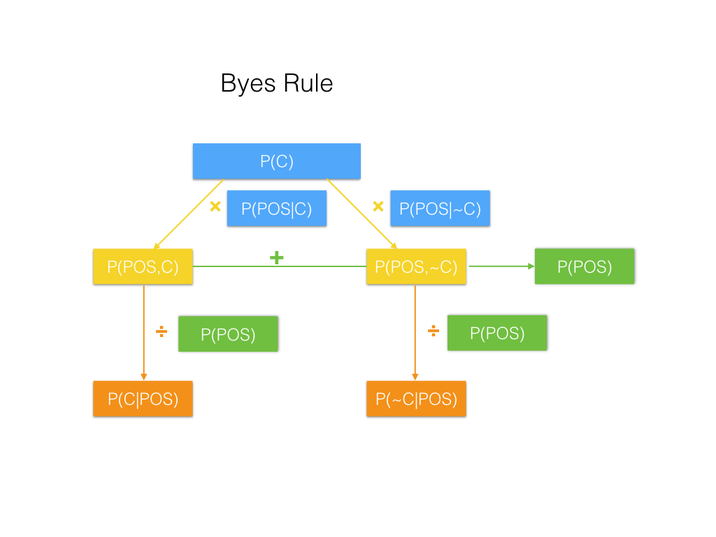

In [47]:
img=Image.open('bayes-rule-graph.jpeg')
img.resize((int(img.size[0]*0.7), int(img.size[1]*0.7)),Image.ANTIALIAS)

## 贝叶斯学习
> H: 假设函数集合  
h: 假设函数 hypothesis  
D: 数据 Data  
P(h|D): 在观测数据（D）情况下假设（h）的概率  

$\begin{align}\large P(h|D) = \frac{P(D|h) · P(h)}{P(D)}\end{align}$  

学习算法如下：

```
foreach h in H: 
    P(h|D) = P(D|h) · P(h) / P(D)
    if P(h|D) is the max:
        return h
```

### 最大(概率)后验假设(MAP)
MAP: Maxium a Posterior probability hypothesis  

我们关心的是最可能的假设 h<sub>map</sub>，所以要求 P(h|D) 概率最大化时的 h，即 argmax(P(h|D))：

$\begin{align} \large h_{map}=argmax(P(h|D)) = argmax(\frac{P(D|h) · P(h)}{P(D)}) \end{align}$  

### 最大(概率)似然假设(ML)
ML: Maxium Likehood probability hypothesis

由于通常情况下P(h)、P(D)很难求出，而我们关心的是最大化P(h|D)，假设P(h)、P(D)是常数，且假设集合H中所有假设h的概率一相同的情况下，我们可以**<font color="red">忽略P(h)、P(D)</font>**，只要求出最大的P(D|h)，我们就认为获得了**<font color="red">近似</font>**最大的P(h|D)。<font size="6">🤔</font>... 所以最大似然公式如下：  

$\begin{align} \large h_{ml}= argmax(P(h|D))= argmax(\frac{P(D|h) · \cancel{P(h)}}{\cancel{P(D)}}) = argmax(P(D|h)) \end{align}$  

实际上找到最大后验假设和最大似然假设，等同于与数据最匹配的假设。 

# 实践中的贝叶斯

- 给定样本数据集D，D = $\large\{<x_i, d_i>\}$, $x_i$是输入空间，$d_i$是输入数据标签，D中数据无噪音(noise free)。
- 要学习的概念基于假设空间，即 $C \in H$ ，C：要学习的概念，H：假设空间

## 无信息先验分布（Uniform Prior）
又称**不知情先验分布**，我们不知道假设的分布，因此假定所有假设先验概率相同  <font size="6">😓</font> 。因此：

假设的概率：  
$\begin{align}\large P(h)= \frac{1}{|H|} \end{align}$  

## 样本标签与假设一致时数据的概率
给定数据时某假设概率：  
$\large P(D|h)=
\left\{\begin{array}{}1 &,if \quad d_i = h(x_i), \forall_{x_i,d_i} \in D, \qquad \small\color{gray}{\text{即如果所有样本中标签与假设一致，则给定假设时该数据出现的概率为1}} \\
0 &. 其他情况\qquad \small\color{gray}{\text{反之如果有任意一个标签与给定假设不一致，则给定假设时该数据概率为0}}
\end{array}\right.$

## 计算数据概率的技巧(trick)
假定H存在于D的空间里，且H为互斥空间，样本数据出现的概率近似等于 sum(**给定假设h时数据D出现的概率** × **特定假设h的先验概率**)  

$\begin{align}  
\large P(D) & \approx \sum\limits_{h_i \in H} \large P(D|h_i) \cdot P(h_i) \\
\\
& \large = \sum\limits_{h_i \in S} P(D|h_i) \cdot P(h_i) \qquad \small \color{gray}{S为所有与数据相匹配的假设的集合，S为H的子集}\\
& \large = \sum\limits_{h_i \in S} 1 \cdot \frac{1}{|H|} \qquad \small \color{gray}{h与数据相匹配，P(h|D)=1}\\
\\
& \large = \frac{|S|}{|H|} \\
\end{align}$

## 化简P(h|D)

$\begin{align} \large P(h|D) = \frac{P(D|h) · P(h)}{P(D)} = 
\large \left\{\begin{array}{} \frac{1 \cdot \frac{1}{H} } {\frac{|S|}{H} } = \frac{1}{|S|} &,\quad h \in S \quad \small \color{gray}{假设与数据相匹配}\\
0 &, \quad h \notin S \quad \small \color{gray}{假设与数据不匹配} \end{array}\right. \end{align}$  

这个公式的含义是：
> 给定一堆数据，特定假设正确的概率与其他版本假设正确的概率是一样的,所以我们可以挑选一个特定假设h。

## 高斯分布噪声下的最大似然假设

- 给定样本数据集D，D = $\{<x_i, d_i>\}$
- $d_i=f(x_i)+ \epsilon_i$ 
- $\epsilon \in N(\mu,\delta^2)$  

> f(x)是未知的假设函数  
> $\epsilon$代表误差  
> [正态分布](http://baike.baidu.com/item/%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)，也叫高斯分布，记为$N(\mu，\delta^2)$，分布概率为 $f(x)=\frac{1}{\sqrt{2\pi \delta}} e^{- \frac{(x-\mu)^2}{2\delta^2}}$，$\mu$：数学期望，$\delta^2$:方差


$\begin{align}
\large h_{ml} & \large = argmax(P(h|D)) \\
\\
& \large = argmax(P(D|h)) \\
\\
& \large = argmax(\prod P(d_i|h_i)) \\
& \large = argmax(\prod \cancel{\frac{1}{\sqrt{2\pi \delta}}} e^{- \frac{1}{2} \cdot \frac{(d_i - h(x_i))^2}{\delta^2}})  \\
& \large = argmax(\prod e^{- \frac{1}{2} \cdot \frac{(d_i - h(x_i))^2}{\delta^2}}) \qquad \small \color{gray}{\text{去掉不影响argmax的常数项}}\\
& \large = argmax(e^{- \frac{1}{2} \sum \frac{(d_i - h(x_i))^2}{\delta^2}}) \qquad \small \color{gray}{\text{e的幂的乘积转换为e的指数的和次幂}} \\
& \large = argmax(- \cancel{\frac{1}{2}} \sum \frac{(d_i - h(x_i))^2}{\cancel{\delta^2}}) \qquad \small \color{gray}{\text{e的对数函数有单调递增特性，对等式两边求e的对数不会影响argmax结果，以替换幂函数形式}} \\
& \large = argmax(- \sum (d_i - h(x_i))^2)) \qquad \small \color{gray}{\text{去掉常数项}} \\
& \large = argmin(\sum (d_i - h(x_i))^2)) \qquad \small \color{gray}{\text{去掉负号变为argmin}}
\end{align}$

神奇之处在于求最大似然假设转化为求误差的平方和，而且这里的假设并没有指定是线回归或是其他函数，也就是说可以是其他任何假设函数，但要注意我们的假设前提是误差服从高斯分布，如果换作别的误差模型，结果就不是这样了。

# 贝叶斯推理

## 贝叶斯网络

贝叶斯网络通常为条件独立的变量组成的有向无环图，按拓扑结构取样（由无来向箭头的节点开始，按照箭头的指向到下一个节点，以此类推）。
如下图取样顺序：A、B、C、D、E：

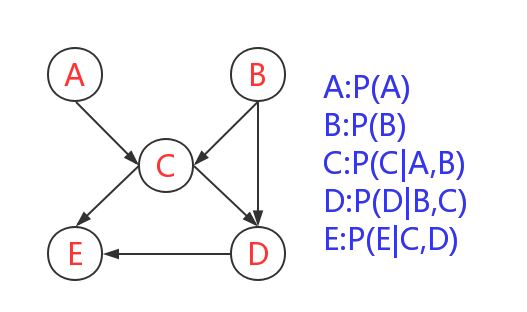

In [53]:
Image.open('bayes-network.png')

图中的箭头发出的节点，表示已经确定的部分。箭头不表示因果关系，而只表示在发出箭头节点发生的情况下，作为指向节点的发生条件。如图中A指向C的含义是P(C|A)，而P(A)、P(C)是独立的。

## 概率推理三剑客

边缘化：$\large P(x)=\sum \limits_y P(x,y)$  

链式法则：$\large P(x,y)=P(x)P(y|x)=P(y)P(x|y)$  

贝叶斯规则：$\begin{align}\large P(y|x) =  \large \frac{P(y)P(x|y)}{P(x)} \end{align}$

## 朴素贝叶斯

### 概念
之所以叫做朴素贝叶斯，是因为假定事件是相互独立的。

### 一般表示形式

$\begin{align} \large P(v|a_1,a_2,...,a_n) = \frac{P(v) \prod \limits_i P(a_i|v)}{Z} \end{align}$  

$\large MAP \quad Class = argmax(P(v) \prod \limits_i P(a_i|v))$